In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('election_results_2024.csv')

In [5]:
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [7]:
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


In [9]:
missing_values = data.isnull().sum()

In [11]:
summary_stats = data.describe()

In [13]:
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

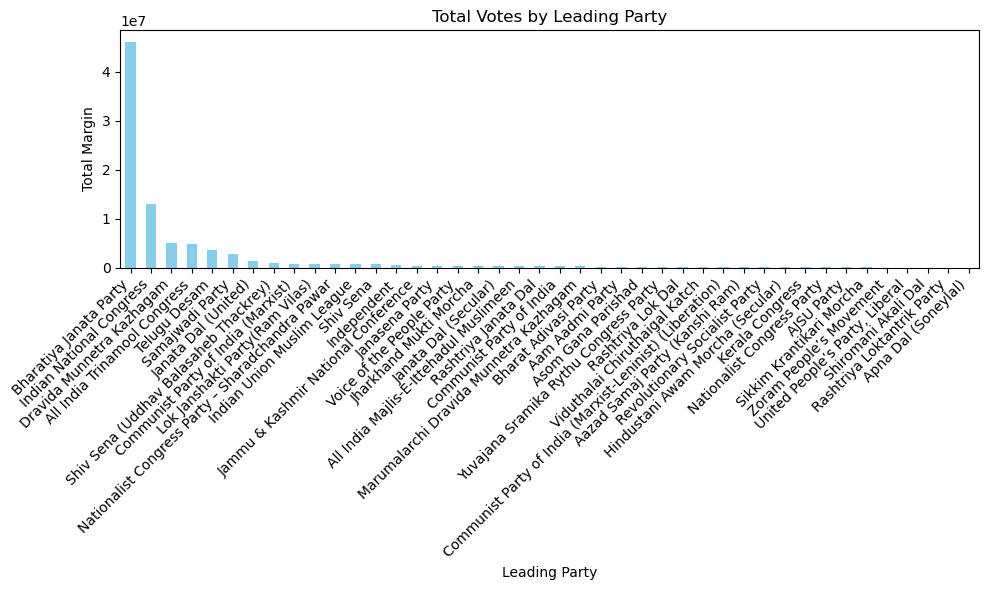

In [15]:
plt.figure(figsize=(10, 6))
votes_by_party = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
votes_by_party.plot(kind='bar', color='skyblue')
plt.title('Total Votes by Leading Party')
plt.ylabel('Total Margin')
plt.xlabel('Leading Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

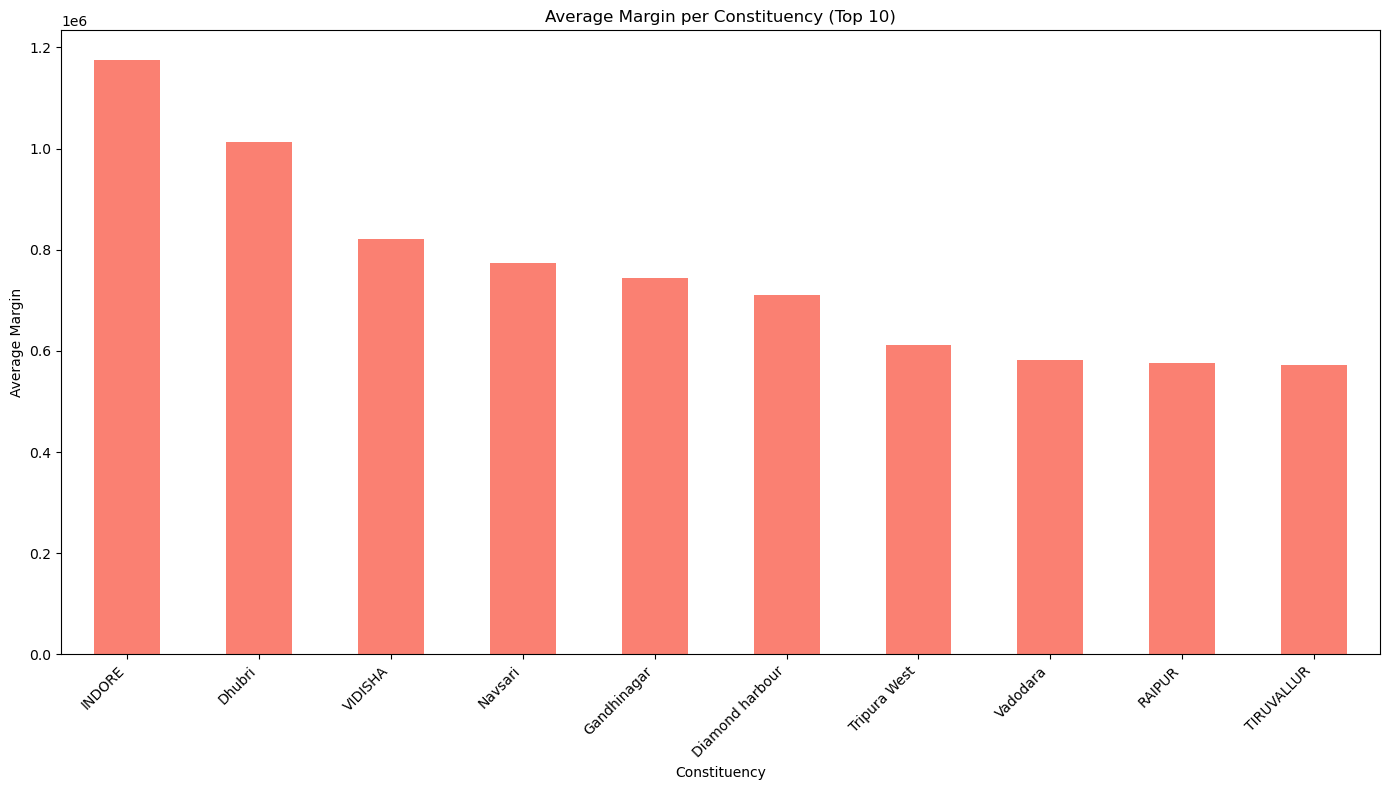

In [17]:
plt.figure(figsize=(14, 8))
average_margin_per_constituency = data.groupby('Constituency')['Margin'].mean().sort_values(ascending=False).head(10)
average_margin_per_constituency.plot(kind='bar', color='salmon')
plt.title('Average Margin per Constituency (Top 10)')
plt.ylabel('Average Margin')
plt.xlabel('Constituency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

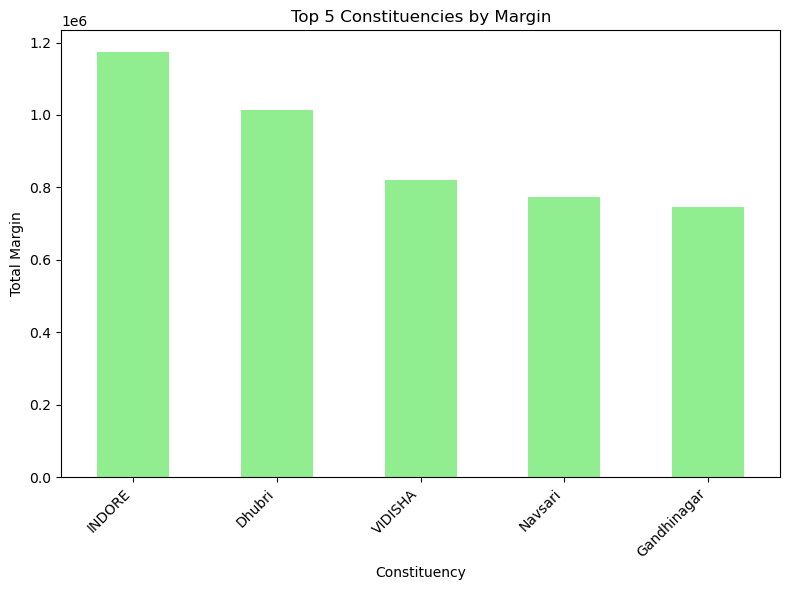

In [19]:
plt.figure(figsize=(8, 6))
top_constituencies_by_margin = data.groupby('Constituency')['Margin'].sum().nlargest(5)
top_constituencies_by_margin.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Constituencies by Margin')
plt.ylabel('Total Margin')
plt.xlabel('Constituency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

In [23]:
# Convert 'Margin' column to numeric, handling errors
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Group and sum, filling any remaining NaN values with 0
party_votes = data.groupby('Leading Party')['Margin'].sum().fillna(0).sort_values(ascending=False)

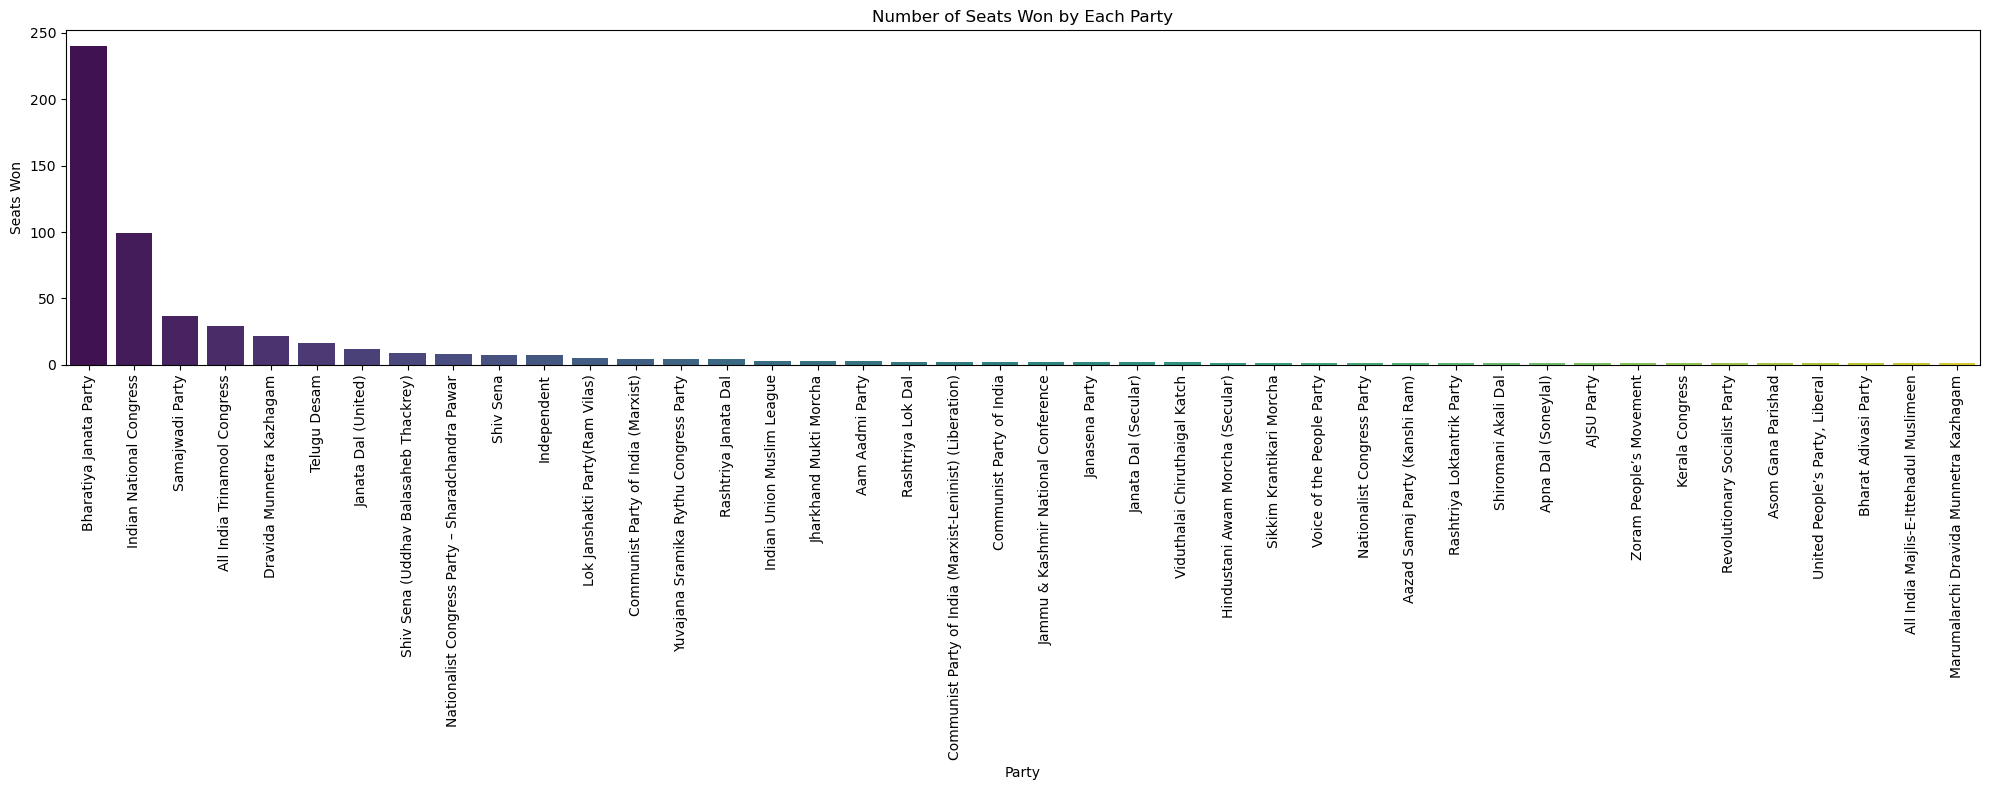

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of seats won by each party
seats_won = data['Leading Party'].value_counts()

# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, hue=seats_won.index, palette='viridis', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


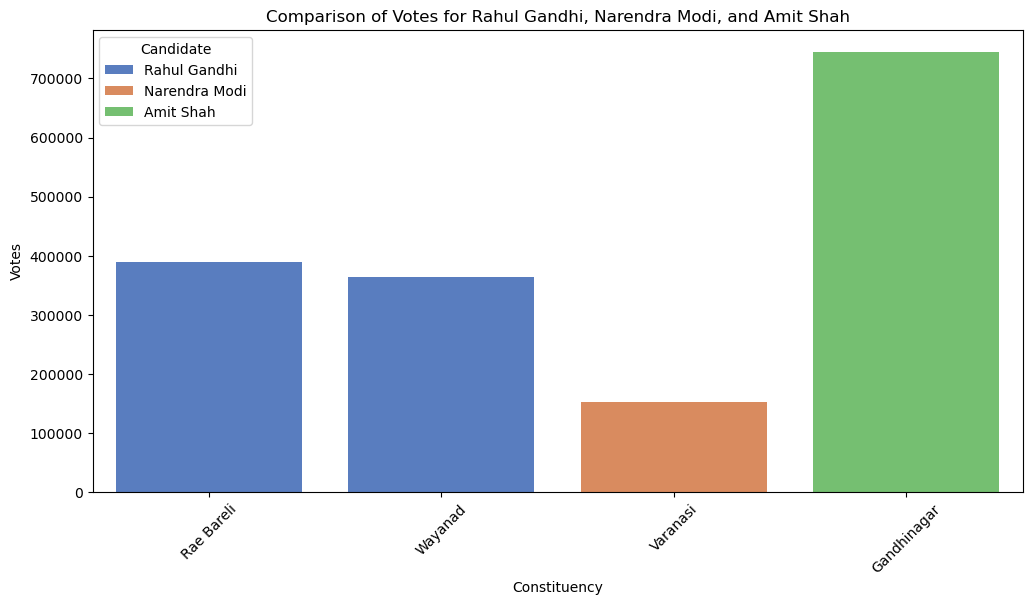

In [27]:
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

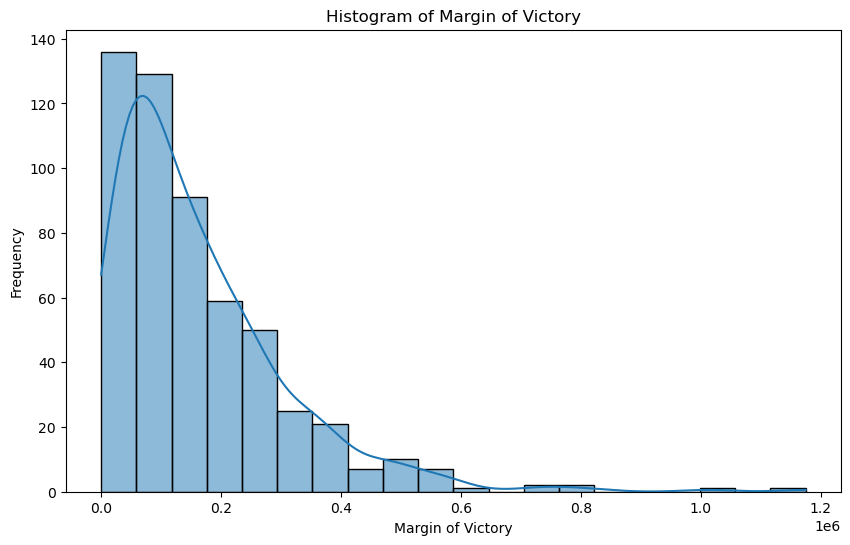

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

<Figure size 1400x800 with 0 Axes>

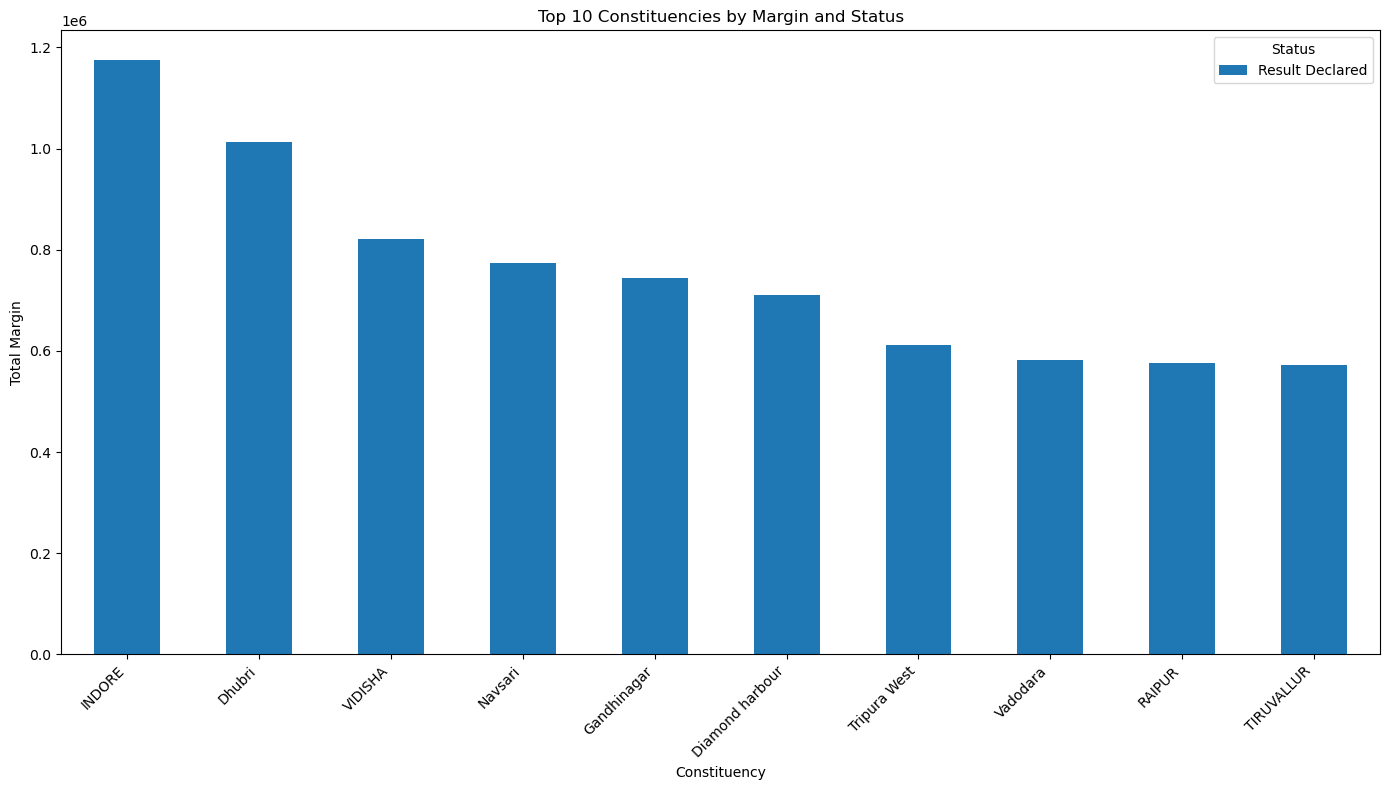

In [31]:
plt.figure(figsize=(14, 8))
top_constituencies_status = data.groupby(['Constituency', 'Status'])['Margin'].sum().nlargest(10).unstack()
top_constituencies_status.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 10 Constituencies by Margin and Status')
plt.ylabel('Total Margin')
plt.xlabel('Constituency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

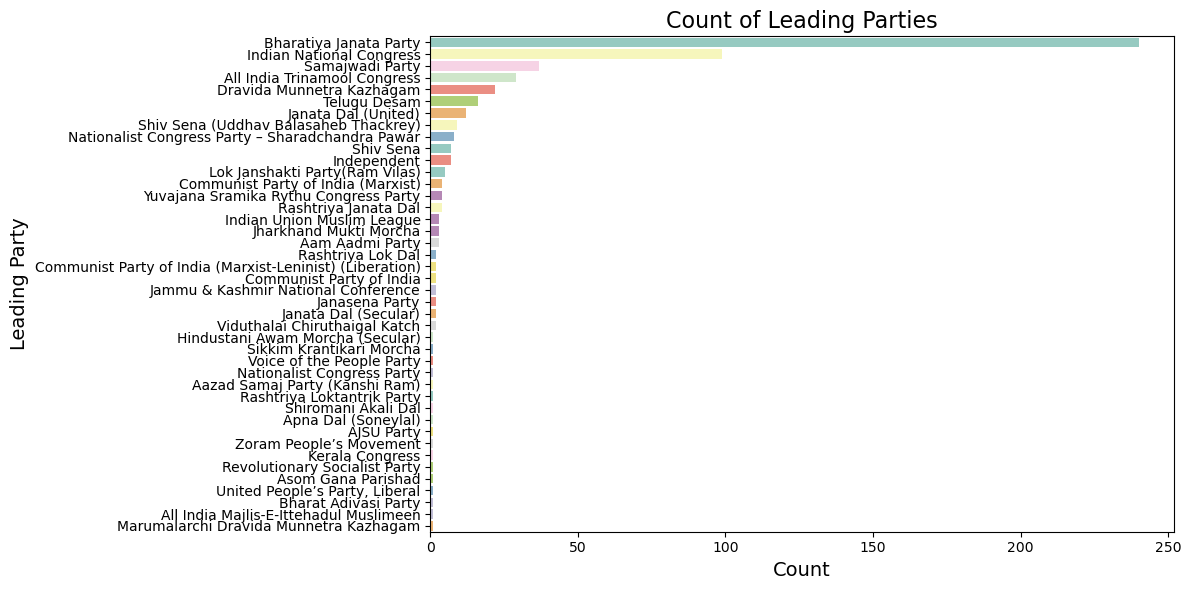

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use countplot with 'hue' set to 'Leading Party' to specify palette
sns.countplot(y='Leading Party', data=data, order=data['Leading Party'].value_counts().index, hue='Leading Party', palette='Set3', orient='v', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Count of Leading Parties', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Leading Party', fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


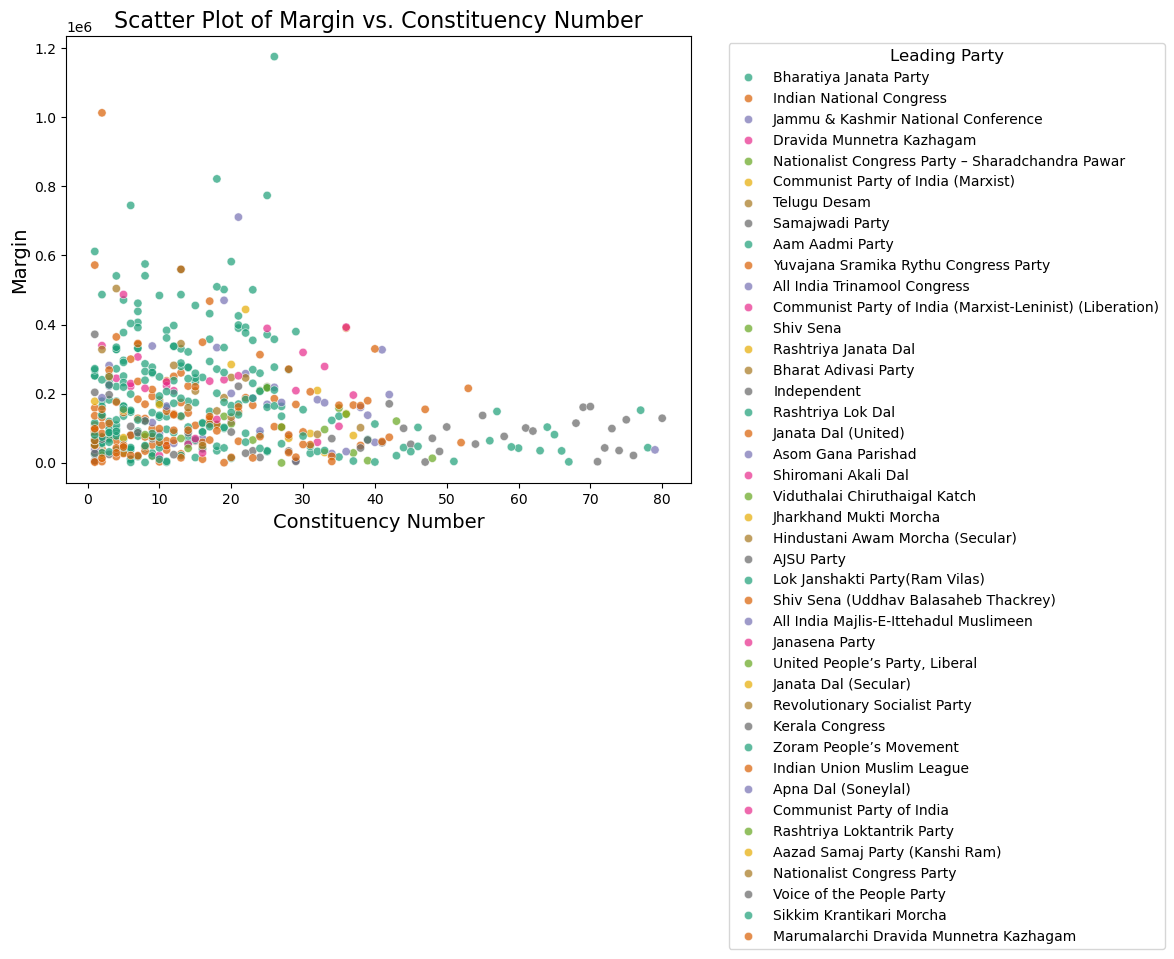

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Create scatter plot with 'hue' set to 'Leading Party' to specify palette
sns.scatterplot(x='Const. No.', y='Margin', hue='Leading Party', data=data, palette='Dark2', alpha=0.7)

# Customize plot labels and title
plt.title('Scatter Plot of Margin vs. Constituency Number', fontsize=16)
plt.xlabel('Constituency Number', fontsize=14)
plt.ylabel('Margin', fontsize=14)

# Adjust legend to be outside the plot to avoid overlap
plt.legend(title='Leading Party', title_fontsize='large', fontsize='medium', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [39]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

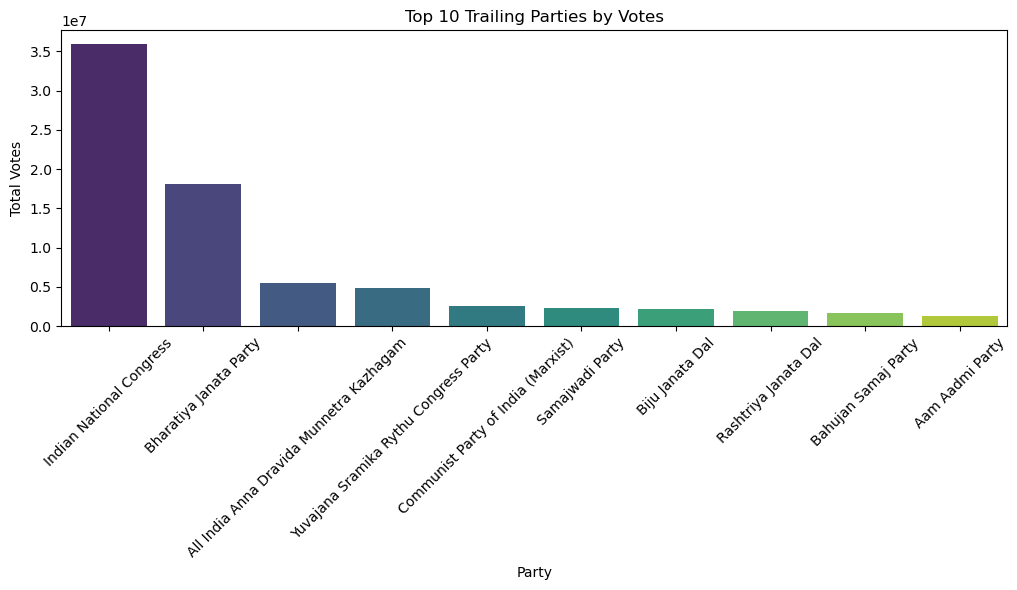

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)

# Explicitly assign hue to x variable and set legend=False
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], hue=trailing_party_votes.index[:10], palette='viridis', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


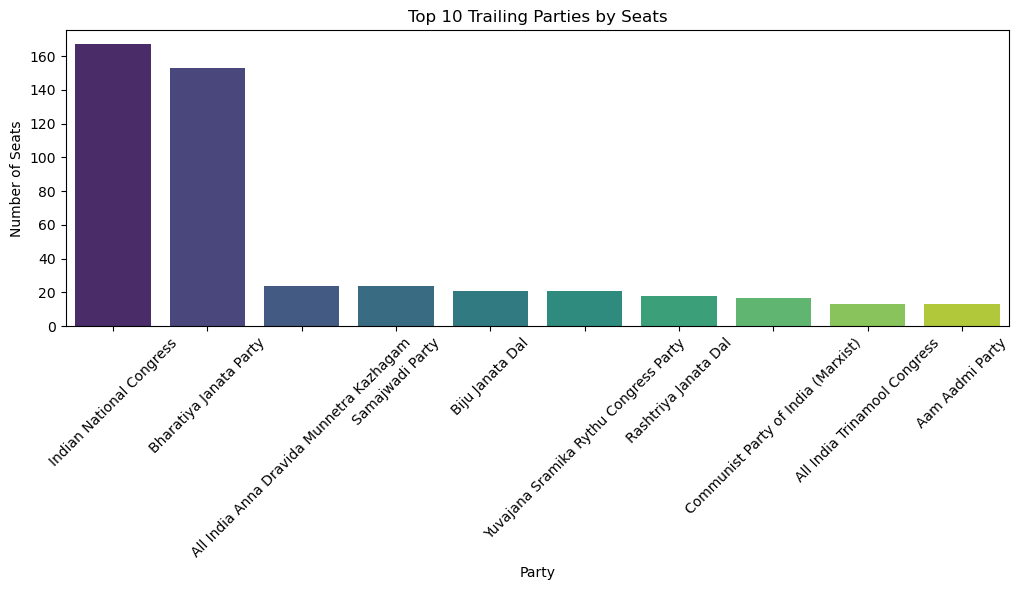

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)

# Create bar plot with 'hue' set to 'x' (trailing_party_seats.index[:10])
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], hue=trailing_party_seats.index[:10], palette='viridis', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
